# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import data
df = pd.read_csv("../data/processed/SPY_Close.csv")
df.head()

,Date,close
0,2025-12-31,6845.50
1,2025-12-30,6896.24
2,2025-12-29,6905.74
3,2025-12-26,6929.94
4,2025-12-24,6932.05


In [3]:
# Convert Date column to datetime
df["Date"] = pd.to_datetime(df["Date"])

In [4]:
# check missing values
print(df.isnull().sum())

Date     0
close    0
dtype: int64


In [5]:
# Sort by date in ascending order
df = df.sort_values('Date').reset_index(drop=True)
df.head()

,Date,close
0,2015-12-31,2043.94
1,2016-01-04,2012.66
2,2016-01-05,2016.71
3,2016-01-06,1990.26
4,2016-01-07,1943.09


In [6]:
df["Date"] = pd.to_datetime(df["Date"])
end_date = df["Date"].max()

start_3y = end_date - pd.DateOffset(years=3)

df_3y = df[df["Date"] >= start_3y].copy()
df_3y.reset_index(drop=True, inplace=True)
df_3y.head()


,Date,close
0,2023-01-03,3824.14
1,2023-01-04,3852.97
2,2023-01-05,3808.10
3,2023-01-06,3895.08
4,2023-01-09,3892.09


In [7]:
df_3y.tail()

,Date,close
747,2025-12-24,6932.05
748,2025-12-26,6929.94
749,2025-12-29,6905.74
750,2025-12-30,6896.24
751,2025-12-31,6845.50


- Log Returns: Raw stock prices often exhibit a "Random Walk" behavior and are non-stationary. Log returns normalize the data and make it easier for statistical models to converge.

In [8]:
# Calculate log returns
df_3y['log_return'] = np.log(df_3y['close'] / df_3y['close'].shift(1))
df_3y.head()

,Date,close,log_return
0,2023-01-03,3824.14,NaN
1,2023-01-04,3852.97,0.007511
2,2023-01-05,3808.10,-0.011714
3,2023-01-06,3895.08,0.022584
4,2023-01-09,3892.09,-0.000768


In [9]:
# Drop the first row with NaN log return
df_3y = df_3y.dropna().reset_index(drop=True)
df_3y.head()

,Date,close,log_return
0,2023-01-04,3852.97,0.007511
1,2023-01-05,3808.10,-0.011714
2,2023-01-06,3895.08,0.022584
3,2023-01-09,3892.09,-0.000768
4,2023-01-10,3919.25,0.006954


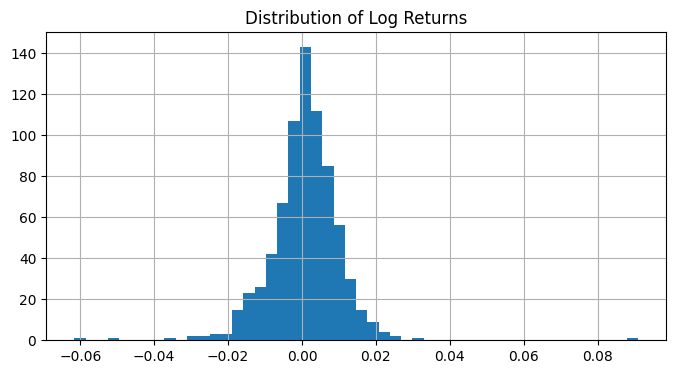

In [10]:
df_3y['log_return'].hist(bins=50, figsize=(8,4))
plt.title("Distribution of Log Returns")
plt.show()

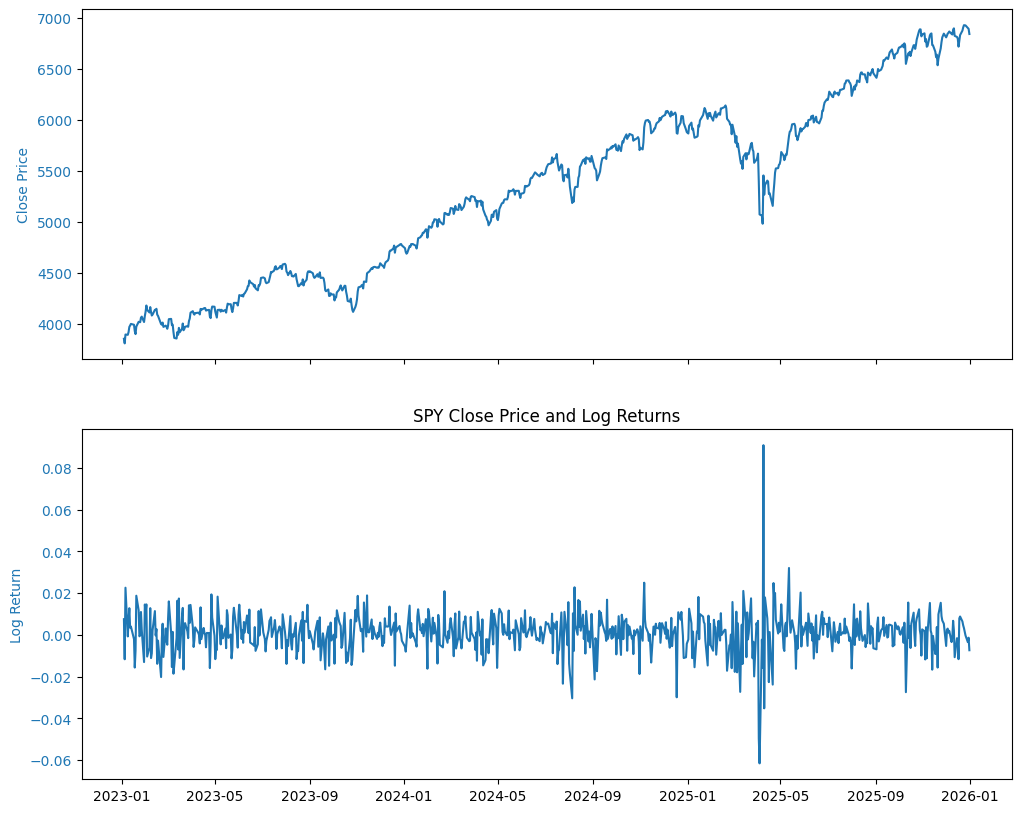

In [11]:
# plot log returns and close price into two charts
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot close price
color = 'tab:blue'
ax1.set_ylabel('Close Price', color=color)
ax1.plot(df_3y['Date'], df_3y['close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Plot log return
color = 'tab:blue'
ax2.set_ylabel('Log Return', color=color)
ax2.plot(df_3y['Date'], df_3y['log_return'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('SPY Close Price and Log Returns')
plt.show()

- Top Plot: Historical closing price of the S&P 500 from 2016 to 2025 show a clear long-term upward trend.

- Bottom Plot: Data appears stationary, oscillating around a mean of zero. it also shows volatility clustering where price swings are more intense.

In [14]:
# Split the last 3 years data into model and forecast sets
df_3y["Date"] = pd.to_datetime(df_3y["Date"])

# Define date ranges
model_start = "2023-01-01"
model_end   = "2025-06-30"

forecast_start = "2025-07-01"
forecast_end   = "2025-12-31"

# Split datasets
df_model = df_3y[
    (df_3y["Date"] >= model_start) &
    (df_3y["Date"] <= model_end)
].copy()

df_forecast = df_3y[
    (df_3y["Date"] >= forecast_start) &
    (df_3y["Date"] <= forecast_end)
].copy()

# Save files
df_model.to_csv("../data/processed/SPY_Close_modeling_2.5y.csv", index=False)
df_forecast.to_csv("../data/processed/SPY_Close_forecast_0.5y.csv", index=False)

print(len(df_model), len(df_forecast))

623 128
